<center><h2> CPE 4040: Homework 4</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or Generative AI's) codes.__
5. <font color=blue> You can find Matplotlib code snippets in the accompanying Jupyter Notebook file to help you make time-domain and frequency-domain plots.  

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.

In [1]:
import pandas as pd
import numpy as np

from numpy.fft import fft, ifft

In [2]:
import matplotlib.pyplot as plt

## Q1: Signal Processing: Square Wave and Random Noise (60 Points)

__A communication system is commonly modelled by the transmitted signal, the channel, and the receiver.__ 

__Let's consider a simple system where the signal is a `square wave` and the the channel adds `white Gaussian noise` to the signal. Therefore, the received signal is represented by__

__$$r(t) = s(t) + n(t)$$ where $s(t)$ = square wave, $n(t)$ = Gaussian noise.__

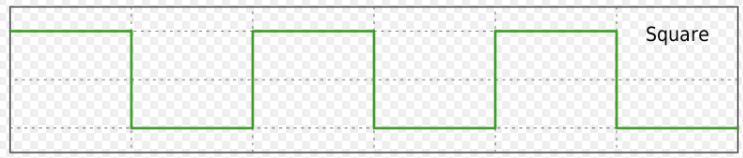

### 1. (8 Points) Generate a periodic square wave by taking a `sign function` on the sine wave, that is,

$$
s(t) = 
\begin{cases} 
1 & \text{if } \sin(2\pi ft) \ge 0 \\
-1 & \text{if } \sin(2\pi ft) < 0
\end{cases}
$$

* Plot a 10-second __square wave__ with amplitude 1, $f$ = 4Hz and sampling rate $f_s$ = 100Hz. Use Matplotlib to plot the signal. You should have a total of 1000 samples. 

* Properly label the x-axis ("Time"), and y-axis ("Amplitude").


In [3]:
def generate_sine_wave(freq, sample_rate, duration):

    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    
    return t, y

### <font color= green> Generate the square wave

In [4]:
frequency = 4        # Frequency 
sampling_rate = 100  # Sampling rate 
duration = 10        # Duration 

# Generate the time axis and square wave signal
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = np.where(np.sin(2 * np.pi * frequency * t) >= 0, 1, -1)  # Square wave with amplitude 1

### <font color= green> Plot the square wave

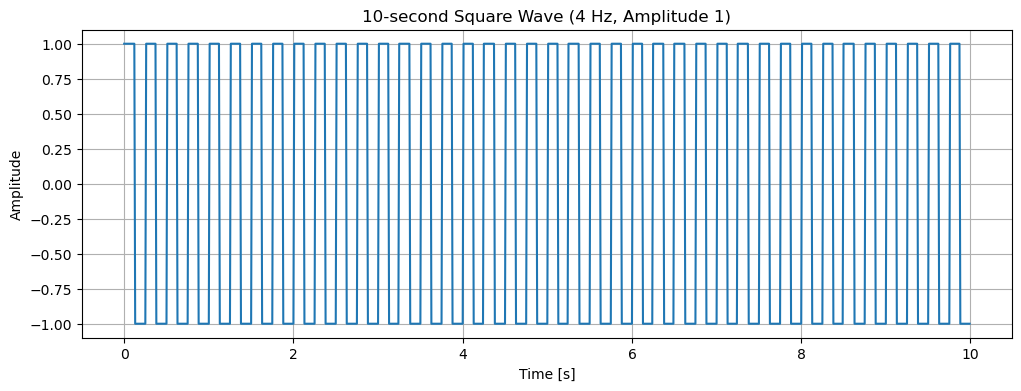

In [5]:
# Plotting the square wave
plt.figure(figsize=(12, 4))
plt.plot(t, y, label='Square Wave')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("10-second Square Wave (4 Hz, Amplitude 1)")
plt.grid(True)
plt.show()

### 2. (6 Points) Frequency domain representation of the square wave. 

Apply the `calculate_fft( )` function below and use Matplotlib to plot the Fourier Transform result for `frequency range from 0 to 50 Hz`.

In [6]:
def calculate_fft(signal,fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N               # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

### <font color= green> Calculate the FFT

In [7]:
fs = sampling_rate  # sampling rate in Hz
T = 10  # total time in seconds
t = np.linspace(0, T, 1000)  # 1000 samples over 10 seconds

# Generate square wave
signal = np.where(np.sin(2*np.pi*frequency*t) >= 0, 1, -1)

# Calculate FFT
frequencies, magnitude = calculate_fft(signal, fs)

### <font color= green> Plot FFT of the square wave for frequency range 0 to 50Hz

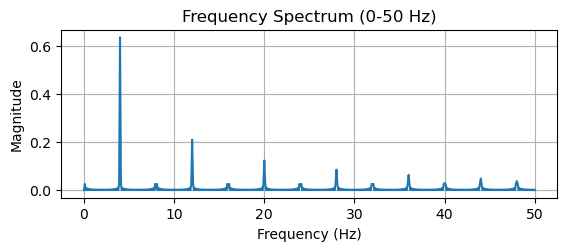

In [8]:
plt.subplot(2, 1, 2)
# Only plot up to 50 Hz for better visualization
mask = frequencies <= 50
plt.plot(frequencies[mask], magnitude[mask])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (0-50 Hz)')
plt.grid(True)


### 3. (10 Points) Find Peak Frequency Components 

You can see a few distinct peaks in the FFT from Step 2. Write a code to identify the frequencies of the top five peaks in the FFT plot, `for frequency range from 0 to 50 Hz`.

Please list the frequencies and their corresponding magnitudes.

In [9]:
from scipy.signal import find_peaks
# Using the frequencies and magnitude from your previous FFT calculation
mask = frequencies <= 50
freq_masked = frequencies[mask]
mag_masked = magnitude[mask]

# Find peaks
peaks, _ = find_peaks(mag_masked)
peak_freqs = freq_masked[peaks]
peak_mags = mag_masked[peaks]

# Get top 5 peaks
top_5_indices = np.argsort(peak_mags)[-5:][::-1]
top_5_freqs = peak_freqs[top_5_indices]
top_5_mags = peak_mags[top_5_indices]

# Print results
print("Top 5 Frequency Components:")
print("Frequency (Hz) | Magnitude")
print("-" * 30)
for freq, mag in zip(top_5_freqs, top_5_mags):
    print(f"{freq:12.1f} | {mag:.3f}")

Top 5 Frequency Components:
Frequency (Hz) | Magnitude
------------------------------
         4.0 | 0.636
        12.0 | 0.210
        20.0 | 0.123
        28.0 | 0.085
        36.0 | 0.063


### 4. (5 Points) Generate an array of Gausian noise with mean = 0 and standard deviation = 0.5

Use `np.random.normal` to generate the noise array. The size of the noise array should also be 1000.

Add the square wave array from 1 and the noise array together. Plot the resulting array.

### <font color= green> Generate the Gaussian noise and the noisy signal

In [10]:
noise = np.random.normal(0, 0.2, 1000)  # mean=0, std=0.2, size=1000

# Add noise to square wave
noisy_signal = y + noise

### <font color= green> Plot the noisy signal

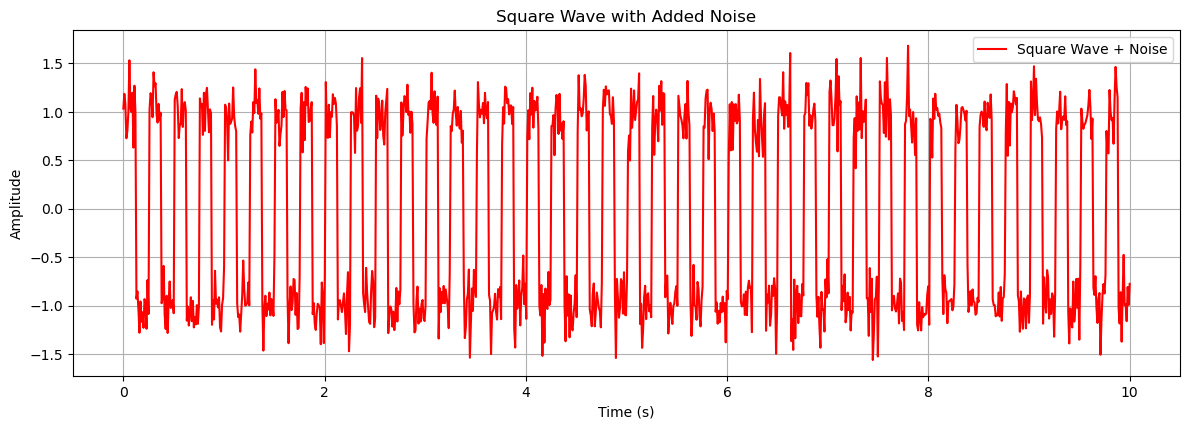

In [11]:
plt.figure(figsize=(12, 8))

# Noisy square wave
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, 'r-', label='Square Wave + Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square Wave with Added Noise')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 5. (6 Points) Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel.

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = $\sum_{i=1}^N s^2/N$, where $N$ is the number of samples.

In [12]:
#Sample
N = 1000
# Calculate average signal power (P_s)
P_s = np.sum(y**2) / N

# Calculate average noise power (P_n)
P_n = np.sum(noise**2) / N

# Calculate SNR in dB
SNR_dB = 10 * np.log10(P_s / P_n)

print(f"Average Signal Power (P_s): {P_s:.4f}")
print(f"Average Noise Power (P_n): {P_n:.4f}")
print(f"SNR: {SNR_dB:.2f} dB")

Average Signal Power (P_s): 1.0000
Average Noise Power (P_n): 0.0393
SNR: 14.05 dB


### 6. (10 Points) Implement a moving-average low-pass filter. 

A moving-average filter is a simple yet effective digital low-pass filter that reduces random noises in the signal. It is characterized by its filter length $L$, specifying how many of the last points of the signal will be averaged to produce the next point in the output.

$$y[n] = \frac{1}{L}\sum_{i=0}^{L-1}x[n-i] $$
where $x[n]$ is the noisy signal, $L$ is the length of the filter, and $y[n]$ is the filtered signal.

* Write a Python function `moving_average_filter` that implements this low-pass filter. The function should accept two parameters: `noisy_signal` and `L`. It should return the filtered signal array. For this exercise, set $L=7$ for the length of the filter.

* Visualization: Plot the noisy signal and the filtered signal in the same figure.

* Please make a comment to compare the signals before and after the filtering. 

### <font color= green> Define the function for moving-average filter and calculate the filter output

In [13]:
def moving_average_filter(noisy_signal, L):
    N = len(noisy_signal)
    filtered_signal = np.zeros(N)
    
    # Apply moving average filter
    for n in range(N):
        # For each point, average the last L points
        # Use min to handle the start of the signal where we have fewer than L points
        start_idx = max(0, n - L + 1)
        filtered_signal[n] = np.mean(noisy_signal[start_idx:n + 1])
    
    return filtered_signal
L = 7  # filter length
filtered_signal = moving_average_filter(noisy_signal, L)

# Calculate and print SNR for before and after filtering
def calculate_snr(signal, noise):
    P_s = np.sum(signal**2) / len(signal)
    P_n = np.sum(noise**2) / len(noise)
    return 10 * np.log10(P_s / P_n)

# Calculate noise components
noise_before = noisy_signal - y
noise_after = filtered_signal - y

snr_before = calculate_snr(y, noise_before)
snr_after = calculate_snr(y, noise_after)

print(f"SNR before filtering: {snr_before:.2f} dB")
print(f"SNR after filtering: {snr_after:.2f} dB")
print(f"SNR improvement: {snr_after - snr_before:.2f} dB")

SNR before filtering: 14.05 dB
SNR after filtering: 2.32 dB
SNR improvement: -11.73 dB


### <font color= green> Plot the noisy signal and the filtered signal

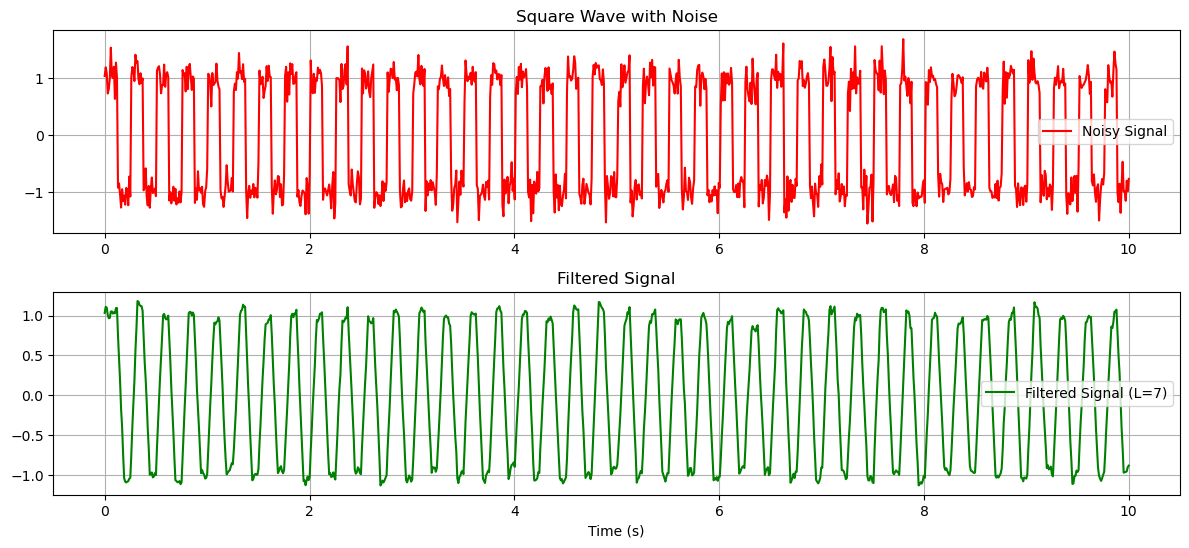

In [14]:
plt.figure(figsize=(12, 8))
# Plot noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, 'r-', label='Noisy Signal')
plt.grid(True)
plt.legend()
plt.title('Square Wave with Noise')

# Plot filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, 'g-', label=f'Filtered Signal (L={L})')
plt.grid(True)
plt.legend()
plt.title('Filtered Signal')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


### <font color=green> Compare the signals before and after the filtering.

### 7. (8 Points) Frequency Domain view of the noisy signal and the filtered signal¶

Use FFT to transform both the noisy signal and the filtered signal to the frequency domain.

Visualization: Plot the noisy signal and the filtered signal in the same figure for comparison.You only need to plot in the frequency range between 0 to 5Hz.

Please make an observation on:
* The noise levels before and after moving-average filtering
* The peak frequency components: what happened there?

### <font color=green> Calculate the FFTs

In [15]:
from numpy.fft import fft

def calculate_fft(signal, fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N               # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

# Generate signals
fs = 100
t = np.linspace(0, 10, 1000)
square_wave = np.where(np.sin(2*np.pi*4*t) >= 0, 1, -1)
noise = np.random.normal(0, 0.2, 1000)
noisy_signal = square_wave + noise

# Apply moving average filter
def moving_average_filter(noisy_signal, L):
    N = len(noisy_signal)
    filtered_signal = np.zeros(N)
    for n in range(N):
        start_idx = max(0, n - L + 1)
        filtered_signal[n] = np.mean(noisy_signal[start_idx:n + 1])
    return filtered_signal

filtered_signal = moving_average_filter(noisy_signal, L=7)

# Calculate FFT for both signals
freqs_noisy, mag_noisy = calculate_fft(noisy_signal, fs)
freqs_filtered, mag_filtered = calculate_fft(filtered_signal, fs)

### <font color= green> Plot FFTs for both the noisy signal and the filtered signal, for frequency range from 0 to 50Hz

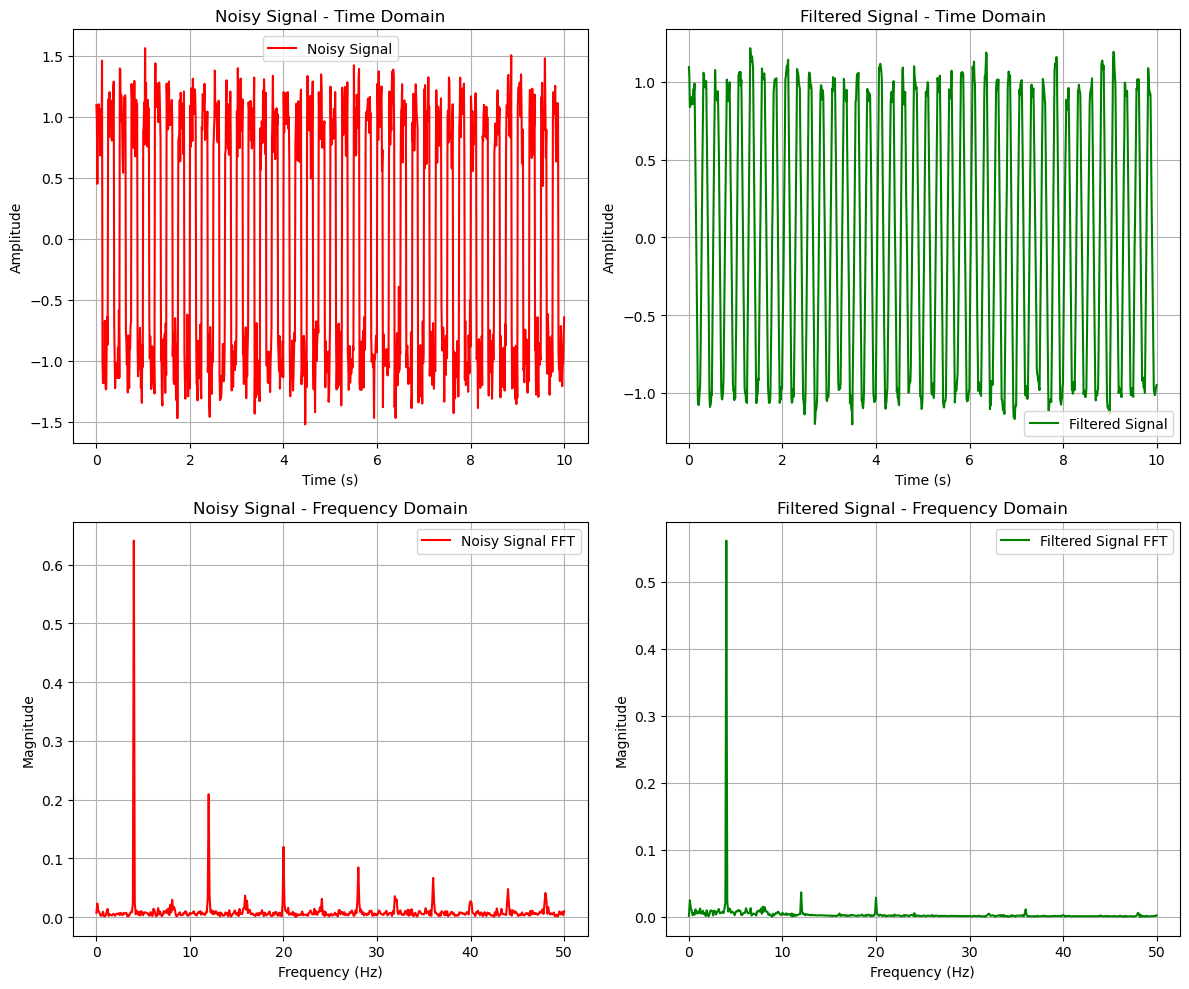

In [16]:
# Plot time domain and frequency domain
plt.figure(figsize=(12, 10))

# Time domain plots
plt.subplot(2, 2, 1)
plt.plot(t, noisy_signal, 'r-', label='Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noisy Signal - Time Domain')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal, 'g-', label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal - Time Domain')
plt.grid(True)
plt.legend()

# Frequency domain plots (up to 50 Hz)
mask = freqs_noisy <= 50
plt.subplot(2, 2, 3)
plt.plot(freqs_noisy[mask], mag_noisy[mask], 'r-', label='Noisy Signal FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Noisy Signal - Frequency Domain')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs_filtered[mask], mag_filtered[mask], 'g-', label='Filtered Signal FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Filtered Signal - Frequency Domain')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### <font color=green> Your observations

### 8. (7 Points) Frequency domain representation of the moving-average filter¶

To gain an insight on how the signal and the noise are shaped by the moving-average filter in the frequency domain, you will calculate the FFT of the filter (we call it the `frequency response`).

Recall in Step 6, the $L$-tap moving-average filter is represented by 
$$ h = \big[ \frac{1}{L}, \frac{1}{L}, \frac{1}{L}, \cdots, \frac{1}{L} \big] $$

* Apply FFT on the filter, $h$, and plot the result for frequency range from 0 to 50Hz. Assume $L=7$. 

* Please make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7.

### <font color=green> Calculate the FFT of the 7-tap moving-average filter

In [17]:
# Create the filter impulse response h[n]
L = 7
h = np.ones(L) / L  # [1/L, 1/L, ..., 1/L]

# Pad the filter with zeros to match signal length for proper frequency resolution
N = 1000  # same length as our signals
h_padded = np.pad(h, (0, N-L), 'constant', constant_values=0)

# Calculate frequency response (FFT of h)
fs = 100
freqs = np.arange(N) * fs / N
H = np.abs(fft(h_padded))

### <font color= green> Plot FFT of the 7-tap moving-average filter

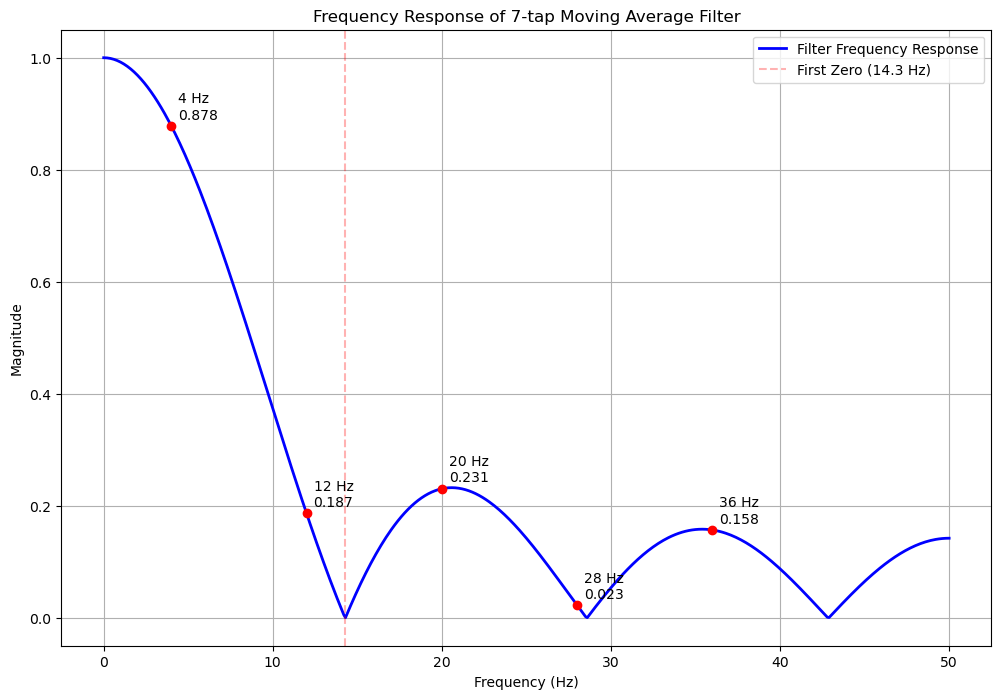

In [18]:
# Plot frequency response up to 50 Hz
plt.figure(figsize=(12, 8))

# Main frequency response plot
mask = freqs <= 50
plt.plot(freqs[mask], H[mask], 'b-', linewidth=2, label='Filter Frequency Response')

# Add markers for key frequencies
f_fundamental = 4  # fundamental frequency of square wave
harmonics = [4, 12, 20, 28, 36]  # fundamental and harmonics
for f in harmonics:
    idx = np.argmin(np.abs(freqs - f))
    plt.plot(f, H[idx], 'ro')
    plt.annotate(f'{f} Hz\n{H[idx]:.3f}', 
                xy=(f, H[idx]), 
                xytext=(5, 5), 
                textcoords='offset points')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Frequency Response of {L}-tap Moving Average Filter')
plt.grid(True)
plt.legend()

# Add the filter's first zero for reference
first_zero = fs/L
plt.axvline(x=first_zero, color='r', linestyle='--', alpha=0.3, 
            label=f'First Zero ({first_zero:.1f} Hz)')
plt.legend()

plt.show()

### <font color=green> Make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7

<h2>Q2: DataFrame indexing and slicing (20 Points)</h2>

<h3>1. Create a DataFrame with the same row indices, column labels, and data as the table below.</h3>

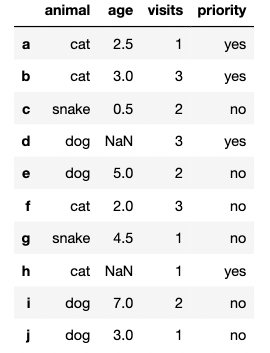

In [19]:
pets = {'animal' :['cat','cat','snake','dog','dog','cat','snake','cat','dog','dog'],
        'age' :[2.5,3.0,0.5,np.nan,5.0,2.0,4.5,np.nan,7.0,3.0],
        'visits' :[1,3,2,3,2,3,1,1,2,1],
        'priority' :['yes','yes','no','yes','no','no','no','yes','no','no']}
index = ['a','b','c','d','e','f','g','h','i','j']
df = pd.DataFrame(pets, index)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>2. Select only the 'animal' and 'visits' columns from the DataFrame and show the result.</h3>

In [20]:
df[["animal","priority"]]

,animal,priority
a,cat,yes
b,cat,yes
c,snake,no
d,dog,yes
e,dog,no
f,cat,no
g,snake,no
h,cat,yes
i,dog,no
j,dog,no


<h3>3. Select the data in rows 'c', 'f', and 'g' and in columns 'animal' and 'age'. Show the result.</h3>

In [21]:
print(df.loc["c","animal"])
print(df.loc["c","age"])
print(df.loc["f","animal"])
print(df.loc["f","age"])
print(df.loc["g","animal"])
print(df.loc["g","age"])

snake
0.5
cat
2.0
snake
4.5


<h3>4. Select the rows where the animal is a dog and the age is less than 5.</h3>

In [22]:
result = df[(df['animal'] == 'dog') & (df['age'] < 5)]

print("Dogs with age less than 5:")
print (result)

Dogs with age less than 5:
  animal  age  visits priority
j    dog  3.0       1       no


<h3>5. In the 'animal' column, change the 'snake' entries to 'python'</h3>

In [25]:
# Change all values that meet a condition
df.loc[df['animal'] == 'snake', 'animal'] = 'python'
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>6. Select the rows where the age is missing, i.e. age value is NaN.</h3>

In [27]:
null = np.where(df['age'].isnull())
null

(array([3, 7], dtype=int64),)

<h3>7. We want to clean up the NaN by replacing it with the average age of the dogs (or cats).</h3>
<h3>First, please find out the average age of the dogs and the average age of the cats.</h3>

In [36]:
dog = df[(df['animal'] == 'dog') & (df['age'])]
dogmean = dog['age'].mean()

cat = df[(df['animal'] == 'cat') & (df['age'])]
catmean = cat['age'].mean()

<h3>8. Replace the NaNs with the average ages and show the resulting DataFrame</h3>

In [37]:
df.loc[(df['animal'] == 'cat') & (df['age'].isna()), 'age'] = catmean
df.loc[(df['animal'] == 'dog') & (df['age'].isna()), 'age'] = dogmean
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,5.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,2.5,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h2>Q3: DataFrame Arithmetics (20 Points)</h2>
    
<h3> 1. Generate a DataFrame that has 10 rows and 8 columns of random numbers (use np.random.rand). </h3>
<h3>Label the columns A, B, C, D, E, F, G and H.</h3>

In [64]:
df = pd.DataFrame(np.random.rand(10, 8), columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
df

,A,B,C,D,E,F,G,H
0,0.155079,0.568815,0.241912,0.123874,0.507907,0.397582,0.570541,0.753905
1,0.544016,0.251331,0.020694,0.266629,0.122014,0.218113,0.580548,0.823047
2,0.821075,0.723963,0.051664,0.171260,0.825666,0.395989,0.302550,0.887425
3,0.986152,0.234529,0.134284,0.421774,0.035571,0.143824,0.774624,0.669116
4,0.855680,0.745735,0.350867,0.227843,0.445032,0.832824,0.392215,0.093417
5,0.059463,0.581686,0.611425,0.208548,0.233972,0.075127,0.034177,0.479356
6,0.167071,0.709186,0.210413,0.844340,0.485133,0.989883,0.843273,0.244689
7,0.219549,0.740688,0.992833,0.620256,0.315644,0.327342,0.793246,0.257854
8,0.208203,0.272338,0.815303,0.793608,0.329861,0.621330,0.704941,0.950129
9,0.361531,0.504351,0.633298,0.518089,0.986574,0.836549,0.462243,0.548919


<h3>2. Calculate the sum of numbers for each column. Display the result.</h3>

In [65]:
print(df['A'].sum())
print(df['B'].sum())
print(df['C'].sum())
print(df['D'].sum())
print(df['E'].sum())
print(df['F'].sum())
print(df['G'].sum())
print(df['H'].sum())

4.377819549126622
5.332622997352519
4.062692352264313
4.196221859422042
4.287374039038878
4.83856152984874
5.458359199015533
5.707857317879133


<h3>3. Which column has the smallest sum? Please answer with the column label.</h3>

In [66]:
df['G']

0    0.570541
1    0.580548
2    0.302550
3    0.774624
4    0.392215
5    0.034177
6    0.843273
7    0.793246
8    0.704941
9    0.462243
Name: G, dtype: float64

<h3>4. Calculate the mean value for each row, then subtract the mean from each element in the row.</h3>

In [67]:
zero = df.loc[0].mean()
one = df.loc[1].mean()
two = df.loc[2].mean()
three = df.loc[3].mean()
four = df.loc[4].mean()
five = df.loc[5].mean()
six = df.loc[6].mean()
seven = df.loc[7].mean()
eight = df.loc[8].mean()
nine = df.loc[9].mean()

newzero = df.loc[0] - zero
print (newzero)
newone = df.loc[1] - one
print (one)
newtwo = df.loc[2] - two
print (newtwo)
newthree = df.loc[3] - three
print (newthree)
newfour = df.loc[4] - four
print (newfour)
newfive = df.loc[5] - five
print (newfive)
newsix = df.loc[6] - six
print (newsix)
newseven = df.loc[7] - seven
print (newseven)
neweight = df.loc[8] - eight
print (neweight)
newnine = df.loc[9] - nine
print (newnine)

A   -0.259873
B    0.153863
C   -0.173040
D   -0.291078
E    0.092955
F   -0.017370
G    0.155589
H    0.338953
Name: 0, dtype: float64
0.353298801972633
A    0.298626
B    0.201514
C   -0.470785
D   -0.351189
E    0.303217
F   -0.126460
G   -0.219899
H    0.364976
Name: 2, dtype: float64
A    0.561168
B   -0.190455
C   -0.290700
D   -0.003210
E   -0.389413
F   -0.281161
G    0.349640
H    0.244132
Name: 3, dtype: float64
A    0.362729
B    0.252783
C   -0.142085
D   -0.265108
E   -0.047919
F    0.339872
G   -0.100737
H   -0.399535
Name: 4, dtype: float64
A   -0.226007
B    0.296217
C    0.325956
D   -0.076921
E   -0.051498
F   -0.210342
G   -0.251292
H    0.193887
Name: 5, dtype: float64
A   -0.394677
B    0.147437
C   -0.351336
D    0.282592
E   -0.076615
F    0.428134
G    0.281524
H   -0.317059
Name: 6, dtype: float64
A   -0.313877
B    0.207261
C    0.459406
D    0.086829
E   -0.217782
F   -0.206084
G    0.259820
H   -0.275573
Name: 7, dtype: float64
A   -0.378761
B   -0.314626
C 

<h3>5. Add an additional row with the mean value of each column. Label this new row "Average".</h3>

In [68]:
Amean = df['A'].mean()
Bmean = df['B'].mean()
Cmean = df['C'].mean()
Dmean = df['D'].mean()
Emean = df['E'].mean()
Fmean = df['F'].mean()
Gmean = df['G'].mean()
Hmean = df['H'].mean()

df.loc[len(df)] = [Amean, Bmean, Cmean, Dmean, Emean, Fmean, Gmean, Hmean]

df = df.rename(index={len(df)-1: 'Average'})

print(df)

                A         B         C         D         E         F         G  \
0        0.155079  0.568815  0.241912  0.123874  0.507907  0.397582  0.570541   
1        0.544016  0.251331  0.020694  0.266629  0.122014  0.218113  0.580548   
2        0.821075  0.723963  0.051664  0.171260  0.825666  0.395989  0.302550   
3        0.986152  0.234529  0.134284  0.421774  0.035571  0.143824  0.774624   
4        0.855680  0.745735  0.350867  0.227843  0.445032  0.832824  0.392215   
5        0.059463  0.581686  0.611425  0.208548  0.233972  0.075127  0.034177   
6        0.167071  0.709186  0.210413  0.844340  0.485133  0.989883  0.843273   
7        0.219549  0.740688  0.992833  0.620256  0.315644  0.327342  0.793246   
8        0.208203  0.272338  0.815303  0.793608  0.329861  0.621330  0.704941   
9        0.361531  0.504351  0.633298  0.518089  0.986574  0.836549  0.462243   
Average  0.437782  0.533262  0.406269  0.419622  0.428737  0.483856  0.545836   

                H  
0      